In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
data_origin = pd.read_csv('./auto-mpg.csv',index_col='car name')

In [3]:
# dataset에 bias column 추가
data_origin['bias'] = 1

In [4]:
# 결측값 제거 및 type casting
data_origin = data_origin[data_origin.horsepower != '?']
data_origin.horsepower = data_origin.horsepower.astype('float')

print(data_origin.head(10))

                            mpg  cylinders  displacement  horsepower  weight  \
car name                                                                       
chevrolet chevelle malibu  18.0          8         307.0       130.0    3504   
buick skylark 320          15.0          8         350.0       165.0    3693   
plymouth satellite         18.0          8         318.0       150.0    3436   
amc rebel sst              16.0          8         304.0       150.0    3433   
ford torino                17.0          8         302.0       140.0    3449   
ford galaxie 500           15.0          8         429.0       198.0    4341   
chevrolet impala           14.0          8         454.0       220.0    4354   
plymouth fury iii          14.0          8         440.0       215.0    4312   
pontiac catalina           14.0          8         455.0       225.0    4425   
amc ambassador dpl         15.0          8         390.0       190.0    3850   

                           acceleration

<ipython-input-4-e425fc9fdf60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_origin.horsepower = data_origin.horsepower.astype('float')


In [5]:
# data scaling
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

data = data_origin.copy()

# data별로 scaling 정도 조정 필요
data['displacement'] = scale(data_origin['displacement'])
data['horsepower'] = scale(data_origin['horsepower'])
data['acceleration'] = scale(data_origin['acceleration'])
data['weight'] = scale(data_origin['weight'])

print(data.head(10))

                            mpg  cylinders  displacement  horsepower  \
car name                                                               
chevrolet chevelle malibu  18.0          8      0.617571    0.456522   
buick skylark 320          15.0          8      0.728682    0.646739   
plymouth satellite         18.0          8      0.645995    0.565217   
amc rebel sst              16.0          8      0.609819    0.565217   
ford torino                17.0          8      0.604651    0.510870   
ford galaxie 500           15.0          8      0.932817    0.826087   
chevrolet impala           14.0          8      0.997416    0.945652   
plymouth fury iii          14.0          8      0.961240    0.918478   
pontiac catalina           14.0          8      1.000000    0.972826   
amc ambassador dpl         15.0          8      0.832041    0.782609   

                             weight  acceleration  model year  origin  bias  
car name                                                 

In [6]:
# dataset을 X와 y로 분할
y_t = data['mpg']
y_t = np.array(y_t).reshape((len(y_t),1))
y_t = pd.DataFrame(y_t, index=data.index)
y_t.columns = ['mpg']

X_t = data.drop('mpg', axis=1)

In [7]:
# train data와 test data로 분할
X_train_t, X_test_t, y_train_t, y_test_t= train_test_split(X_t, y_t, test_size = 0.2, shuffle=False, random_state=1004)

print('X_train_t shape:', X_train_t.shape)
print('X_test_t shape:', X_test_t.shape)
print('y_train_t shape:', y_train_t.shape)
print('y_test_t shape:', y_test_t.shape)

X_train_t shape: (313, 8)
X_test_t shape: (79, 8)
y_train_t shape: (313, 1)
y_test_t shape: (79, 1)


In [8]:
# 식에 맞도록 차원 변화 (NxD에서 DxN으로)
X_train = X_train_t.T
X_test = X_test_t.T
y_train = y_train_t.T
y_test = y_test_t.T

# dataset의 차원
print('X_train shape:', X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (8, 313)
X_test shape: (8, 79)
y_train shape: (1, 313)
y_test shape: (1, 79)


In [9]:
X_train.head(10)

car name,chevrolet chevelle malibu,buick skylark 320,plymouth satellite,amc rebel sst,ford torino,ford galaxie 500,chevrolet impala,plymouth fury iii,pontiac catalina,amc ambassador dpl,...,buick skylark limited,chevrolet citation,oldsmobile omega brougham,pontiac phoenix,vw rabbit,toyota corolla tercel,chevrolet chevette,datsun 310,chevrolet citation,ford fairmont
cylinders,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,4.000000,6.000000,6.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
displacement,0.617571,0.728682,0.645995,0.609819,0.604651,0.932817,0.997416,0.961240,1.000000,0.832041,...,0.214470,0.271318,0.271318,0.214470,0.077519,0.054264,0.077519,0.046512,0.214470,0.186047
horsepower,0.456522,0.646739,0.565217,0.565217,0.510870,0.826087,0.945652,0.918478,0.972826,0.782609,...,0.239130,0.375000,0.375000,0.239130,0.163043,0.076087,0.130435,0.103261,0.239130,0.228261
weight,0.536150,0.589736,0.516870,0.516019,0.520556,0.773462,0.777148,0.765240,0.797278,0.634250,...,0.299688,0.278424,0.308194,0.267366,0.150553,0.100652,0.143748,0.115112,0.301956,0.356394
acceleration,0.238095,0.208333,0.178571,0.238095,0.148810,0.119048,0.059524,0.029762,0.119048,0.029762,...,0.476190,0.196429,0.291667,0.309524,0.398810,0.642857,0.446429,0.500000,0.505952,0.601190
model year,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,...,79.000000,79.000000,79.000000,79.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
origin,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,3.000000,1.000000,1.000000
bias,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# 성능 테스트 위해 MSE 정의
def mean_squared_error(y_true, prediction):
  mse = np.mean((y_true - prediction) ** 2)
  return np.mean(mse)

In [11]:
# 성능 테스트 위해 실제 데이터와 예측 데이터의 위치 보여주는 그래프 그리는 함수 작성
def prediction_solution(y_true, prediction, X):
  N = X.shape[1]
  x = np.arange(N)

  x = np.reshape(x, (1,79))
  y_true = np.reshape(y_true, (1,79))
  prediction = np.reshape(prediction, (1,79))
  
  # x축에 실제 데이터, y축에 예측 데이터
  plt.plot(y_true, prediction, 'bo')

  plt.xlabel('y_test')
  plt.ylabel('prediction')

  plt.axis([15,50,15,50])

  plt.legend()
  plt.show()

In [13]:
# MSE, 성능 테스트 위한 비교군
class MSE:
  # Learning rate, iteration, parameter 설정
  def __init__(self,learning_rate=0.00001,iter=100000):
    self.learning_rate = learning_rate
    self.iter = iter
    self.w = None

  # Learning with Gradient Descent
  def fit(self, X, y):
    # parameter 초기화
    rows, columns = X.shape
    self.w = np.zeros(rows)
    self.w = np.array(self.w).reshape((len(self.w),1))
      
    # Data size
    N = len(X)

    # Closed-form Solution
    p1 = np.dot(X, X.T)
    pw = np.dot(np.linalg.inv(p1), X)
    self.w = np.dot(pw, y.T)

  def predict(self, x):
    y_predict = np.dot(self.w.T, x)
    return y_predict.round(1)

In [14]:
# MSLE
class MSLE:
  # Learning rate, iteration, parameter 설정
  def __init__(self,learning_rate=0.00001,iter=100000):
    self.learning_rate = learning_rate
    self.iter = iter
    self.w = None

  # Learning with Gradient Descent
  def fit(self, X, y):
    # parameter 초기화
    rows, columns = X.shape
    self.w = np.zeros(rows)
    self.w = np.array(self.w).reshape((len(self.w),1))
      
    # Data size
    N = len(X)

    for i in range(self.iter):
      y_hat = np.dot(self.w.T, X)

      # Loss function의 미분값 계산
      pl = np.log(y+1) - np.log(y_hat+1)
      dpl = X/(y_hat+1)
      dL = -1 * (2/N) * np.dot(dpl, pl.T)

      # parameter update
      self.w -= (self.learning_rate * dL)

  def predict(self, x):
    y_predict = np.dot(self.w.T, x)
    return y_predict.round(1)

In [15]:
# MLE
class MLE:
  # Learning rate, iteration, parameter 설정
  def __init__(self,learning_rate=0.000001,iter=100000):
    self.learning_rate = learning_rate
    self.iter = iter
    self.w = None
    self.var = 0

  # Learning with Gradient Descent
  def fit(self, X, y, var):
    # parameter 초기화
    rows, columns = X.shape
    self.w = np.zeros(rows)
    self.w = np.array(self.w).reshape((len(self.w),1))

    # variance 초기화
    self.var = var
      
    # Data size
    N = len(X)

    for i in range(self.iter):
      y_hat = np.dot(self.w.T, X)

      # Loss function의 미분값 계산
      pl = y - np.dot(self.w.T, X)
      dL = np.dot(X, pl.T) / var

      # parameter update
      self.w += (self.learning_rate * dL)

  def predict(self, x):
    y_predict = np.dot(self.w.T, x)
    return y_predict.round(1)

In [16]:
#MAP
class MAP:
  # Learning rate, iteration, parameter, variance 설정
  def __init__(self, learning_rate=0.000001, iter=100000):
    self.learning_rate = learning_rate
    self.iter = iter
    self.w = None
    self.var_w = None
    self.var_model = None

  def fit(self, X, y, var_model, var_w):
    # parameter 초기화
    rows, columns = X.shape
    self.w = np.zeros(rows)
    self.w = np.array(self.w).reshape((len(self.w),1))

    # variance 초기화
    self.var_model = var_model
    self.var_w = var_w

    # Data size
    N = len(X)

    for i in range(self.iter):
      y_hat = np.dot(self.w.T, X)

      # Loss function의 미분값 계산
      pl = y - np.dot(self.w.T, X)
      dM = (np.dot(X, pl.T) / self.var_model) - (self.w / self.var_w)

      # parameter update
      self.w += (self.learning_rate * dM)

  def predict(self, x):
    y_predict = np.dot(self.w.T, x)
    return y_predict.round(1)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


[[24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8 44.3 43.4 36.4 30.
  44.6 33.8 29.8 32.7 23.7 35.  32.4 27.2 26.6 25.8 23.5 30.  39.1 39.
  35.1 32.3 37.  37.7 34.1 34.7 34.4 29.9 33.  33.7 32.4 32.9 31.6 28.1
  30.7 25.4 24.2 22.4 26.6 20.2 17.6 28.  27.  34.  31.  29.  27.  24.
  36.  37.  31.  38.  36.  36.  36.  34.  38.  32.  38.  25.  38.  26.
  22.  32.  36.  27.  27.  44.  32.  28.  31. ]]

[[24.7 22.5 30.2 28.4 29.2 29.8 30.9 31.4 26.3 31.2 30.6 29.  25.4 24.3
  33.3 31.3 32.4 26.3 30.  28.6 30.6 28.6 27.8 28.1 26.5 29.5 34.1 31.8
  34.2 32.3 32.5 32.5 32.9 30.3 31.  28.6 31.1 31.8 30.8 29.2 29.2 24.9
  24.5 27.1 26.5 22.9 21.1 24.8 22.9 27.8 27.7 29.1 28.4 28.9 27.6 26.9
  32.8 33.  33.4 31.4 30.9 32.6 32.4 32.1 33.7 33.6 33.4 25.5 26.3 28.8
  26.8 30.  30.1 26.5 27.5 31.2 30.7 28.  27.3]]

MSE: 27.463164556962028


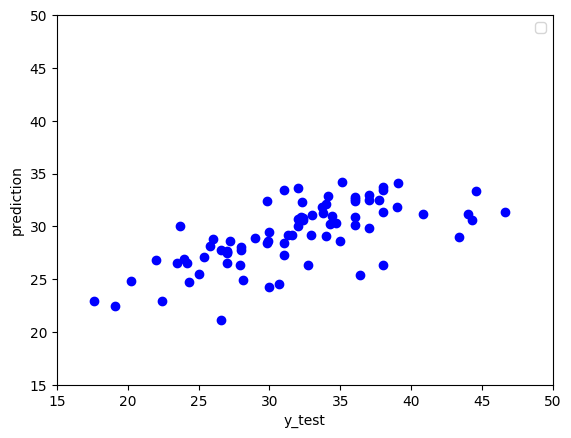

In [17]:
mse = MSE()
mse.fit(X_train, y_train)
prediction = mse.predict(X_test)

print(y_test.values)
print()
print(prediction)
print()

mse = mean_squared_error(y_test, prediction)
print("MSE: {}".format(mse))

prediction_solution(y_test, prediction, X_test)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


[[24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8 44.3 43.4 36.4 30.
  44.6 33.8 29.8 32.7 23.7 35.  32.4 27.2 26.6 25.8 23.5 30.  39.1 39.
  35.1 32.3 37.  37.7 34.1 34.7 34.4 29.9 33.  33.7 32.4 32.9 31.6 28.1
  30.7 25.4 24.2 22.4 26.6 20.2 17.6 28.  27.  34.  31.  29.  27.  24.
  36.  37.  31.  38.  36.  36.  36.  34.  38.  32.  38.  25.  38.  26.
  22.  32.  36.  27.  27.  44.  32.  28.  31. ]]

[[24.1 21.7 24.5 24.8 24.8 24.8 24.9 24.9 24.1 24.9 24.6 24.6 23.3 24.5
  24.9 24.9 24.6 22.3 26.  24.5 24.9 24.5 24.5 24.5 22.1 24.5 25.3 24.6
  25.3 25.3 25.3 25.3 25.3 24.6 24.6 24.6 24.9 25.2 25.2 25.2 25.2 24.8
  22.4 22.7 22.7 22.  19.6 22.1 22.  24.9 24.9 24.9 24.9 24.9 24.9 24.9
  25.3 25.6 25.6 24.9 24.9 25.6 25.6 25.6 25.6 25.6 25.6 22.4 22.4 24.9
  22.4 25.5 24.9 24.9 24.9 25.3 24.9 24.9 24.9]]

MSE: 84.7425316455696


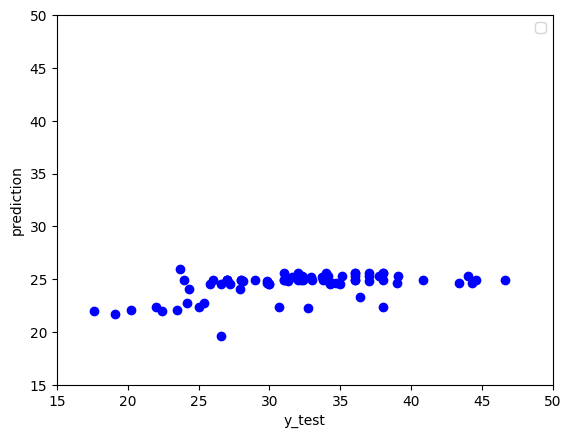

In [18]:
msle = MSLE()
msle.fit(X_train, y_train)
prediction = msle.predict(X_test)

print(y_test.values)
print()
print(prediction)
print()

mse = mean_squared_error(y_test, prediction)
print("MSE: {}".format(mse))

prediction_solution(y_test, prediction, X_test)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


[[24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8 44.3 43.4 36.4 30.
  44.6 33.8 29.8 32.7 23.7 35.  32.4 27.2 26.6 25.8 23.5 30.  39.1 39.
  35.1 32.3 37.  37.7 34.1 34.7 34.4 29.9 33.  33.7 32.4 32.9 31.6 28.1
  30.7 25.4 24.2 22.4 26.6 20.2 17.6 28.  27.  34.  31.  29.  27.  24.
  36.  37.  31.  38.  36.  36.  36.  34.  38.  32.  38.  25.  38.  26.
  22.  32.  36.  27.  27.  44.  32.  28.  31. ]]

[[26.3 22.5 29.3 29.  29.4 29.6 30.1 30.4 26.9 30.3 29.5 28.9 26.3 27.1
  31.1 30.3 30.2 25.2 31.4 28.6 30.  28.1 27.8 27.8 24.4 28.5 31.6 29.6
  31.7 30.9 31.  31.  31.1 29.1 29.3 28.4 29.9 30.7 30.3 29.6 29.7 27.5
  24.7 25.8 25.7 22.8 18.5 23.7 23.  28.1 28.2 28.6 28.5 28.5 27.8 27.8
  30.6 31.4 31.5 29.7 29.4 31.  31.2 31.  31.7 31.7 31.6 24.2 24.  28.3
  24.2 30.  29.  27.5 28.1 30.  29.2 28.3 28. ]]

MSE: 34.330000000000005


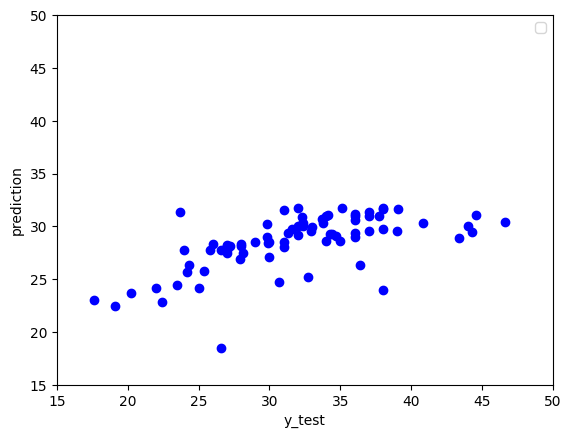

In [19]:
mle = MLE()
mle.fit(X_train, y_train, 1)
prediction = mle.predict(X_test)

print(y_test.values)
print()
print(prediction)
print()

mse = mean_squared_error(y_test, prediction)
print("MSE: {}".format(mse))

prediction_solution(y_test, prediction, X_test)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


[[24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8 44.3 43.4 36.4 30.
  44.6 33.8 29.8 32.7 23.7 35.  32.4 27.2 26.6 25.8 23.5 30.  39.1 39.
  35.1 32.3 37.  37.7 34.1 34.7 34.4 29.9 33.  33.7 32.4 32.9 31.6 28.1
  30.7 25.4 24.2 22.4 26.6 20.2 17.6 28.  27.  34.  31.  29.  27.  24.
  36.  37.  31.  38.  36.  36.  36.  34.  38.  32.  38.  25.  38.  26.
  22.  32.  36.  27.  27.  44.  32.  28.  31. ]]

[[26.4 22.5 29.3 29.1 29.5 29.6 30.1 30.4 26.9 30.3 29.5 29.  26.3 27.2
  31.  30.3 30.1 25.2 31.4 28.6 30.  28.1 27.8 27.8 24.3 28.5 31.6 29.5
  31.6 30.8 30.9 31.  31.1 29.1 29.2 28.4 29.9 30.7 30.3 29.6 29.7 27.6
  24.7 25.8 25.7 22.8 18.5 23.7 23.  28.2 28.2 28.6 28.5 28.5 27.9 27.8
  30.6 31.3 31.5 29.7 29.4 31.  31.2 31.  31.7 31.6 31.5 24.1 24.  28.3
  24.2 30.  29.  27.6 28.1 30.  29.2 28.3 28.1]]

MSE: 34.40949367088608


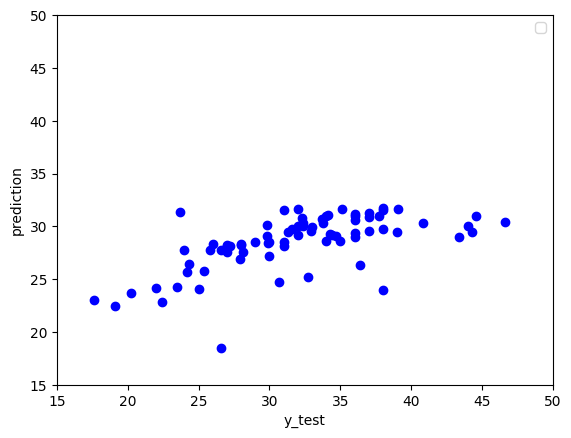

In [20]:
map = MAP()
map.fit(X_train, y_train, 1, 1)
prediction = map.predict(X_test)

print(y_test.values)
print()
print(prediction)
print()

mse = mean_squared_error(y_test,prediction)
print("MSE: {}".format(mse))

prediction_solution(y_test, prediction, X_test)